<a href="https://colab.research.google.com/github/AabidMK/CricketIQ_Infosys_Internship_Feb2025/blob/Mudra-Bhavya-Sri/DataVisualizationTask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#Loding the dataset
deliveries_df = pd.read_csv("/content/deliveries.csv", on_bad_lines='skip')
ipl_df = pd.read_csv("/content/IPL_Data.45.csv")

In [ ]:
# Set the seaborn style
sns.set_style("whitegrid")


<ipython-input-14-9d0fb59f4a48>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_runs_per_over.index, y=total_runs_per_over.values, palette="viridis")


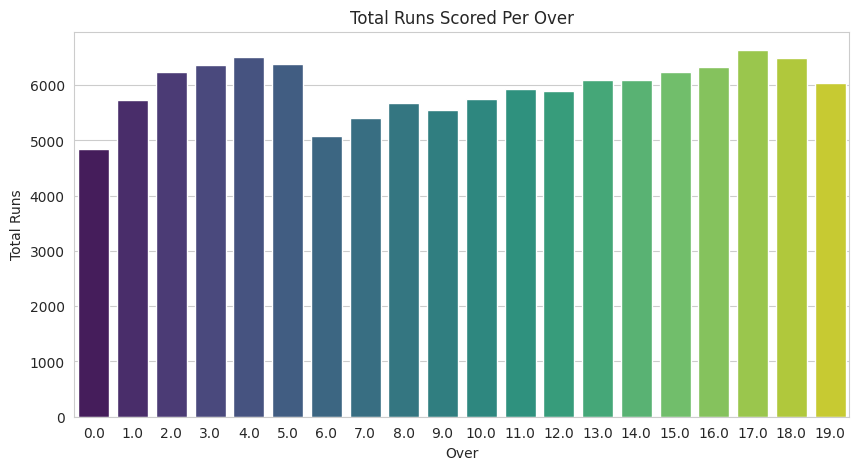

In [ ]:
# 1. Total Runs Scored Per Over
total_runs_per_over = deliveries_df.groupby("over")["total_runs"].sum()
plt.figure(figsize=(10, 5))
sns.barplot(x=total_runs_per_over.index, y=total_runs_per_over.values, palette="viridis")
plt.title("Total Runs Scored Per Over")
plt.xlabel("Over")
plt.ylabel("Total Runs")
plt.show()


<ipython-input-15-28c2d02050eb>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dismissal_counts.index, y=dismissal_counts.values, palette="pastel")


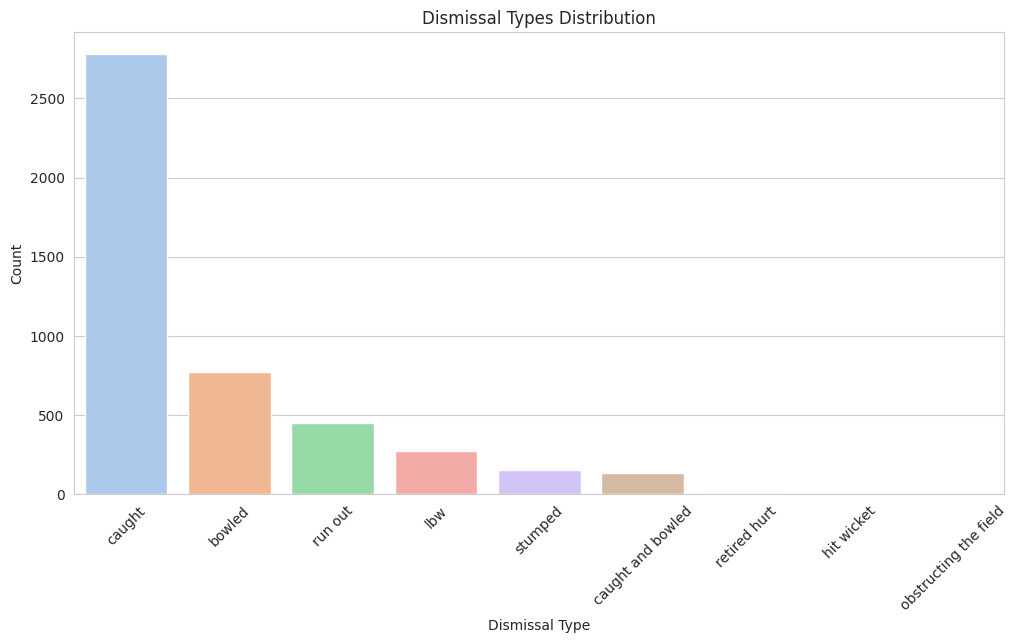

In [ ]:
# 2. Dismissal Types Distribution
dismissal_counts = deliveries_df["dismissal_kind"].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=dismissal_counts.index, y=dismissal_counts.values, palette="pastel")
plt.title("Dismissal Types Distribution")
plt.xlabel("Dismissal Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


<ipython-input-16-2f10b363bf9c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=extra_runs_by_team.index, y=extra_runs_by_team.values, palette="coolwarm")


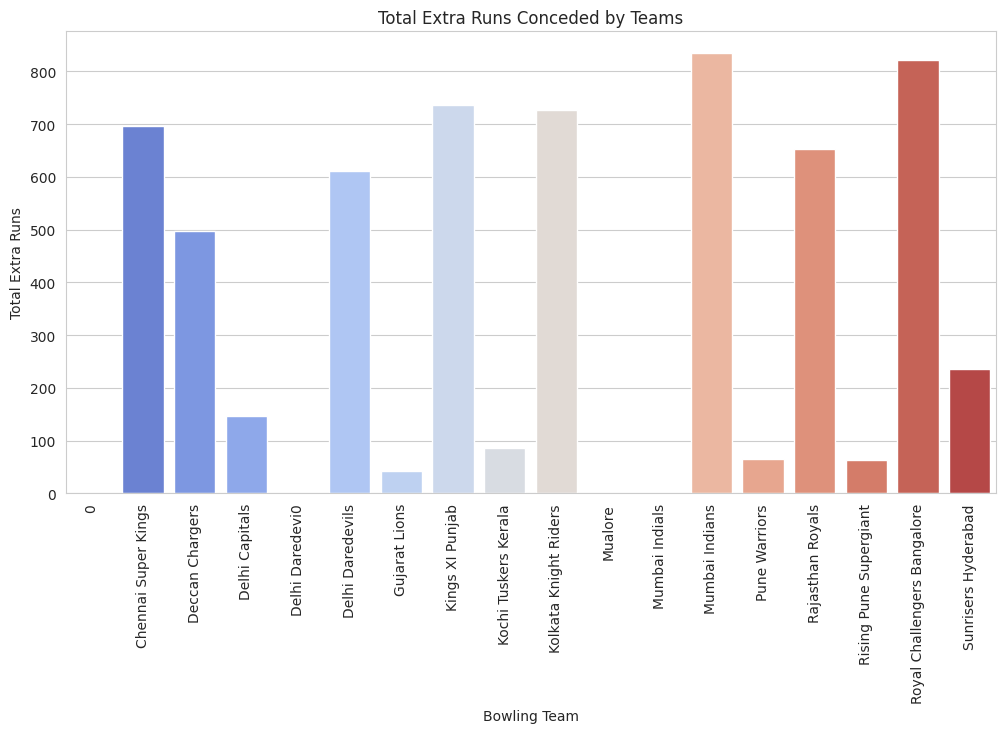

In [ ]:
# 3. Total Extra Runs Conceded by Teams
extra_runs_by_team = deliveries_df.groupby("bowling_team")["extra_runs"].sum()
plt.figure(figsize=(12, 6))
sns.barplot(x=extra_runs_by_team.index, y=extra_runs_by_team.values, palette="coolwarm")
plt.title("Total Extra Runs Conceded by Teams")
plt.xlabel("Bowling Team")
plt.ylabel("Total Extra Runs")
plt.xticks(rotation=90)
plt.show()



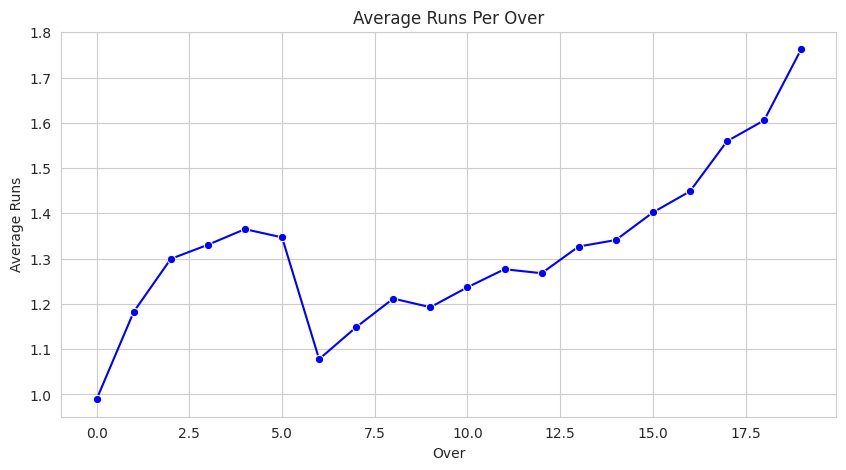

In [ ]:
# 4. Average Runs Per Over
average_runs_per_over = deliveries_df.groupby("over")["total_runs"].mean()
plt.figure(figsize=(10, 5))
sns.lineplot(x=average_runs_per_over.index, y=average_runs_per_over.values, marker="o", color="blue")
plt.title("Average Runs Per Over")
plt.xlabel("Over")
plt.ylabel("Average Runs")
plt.grid(True)
plt.show()


<ipython-input-18-d70cd9be7850>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=runs_distribution.index, y=runs_distribution.values, palette="muted")


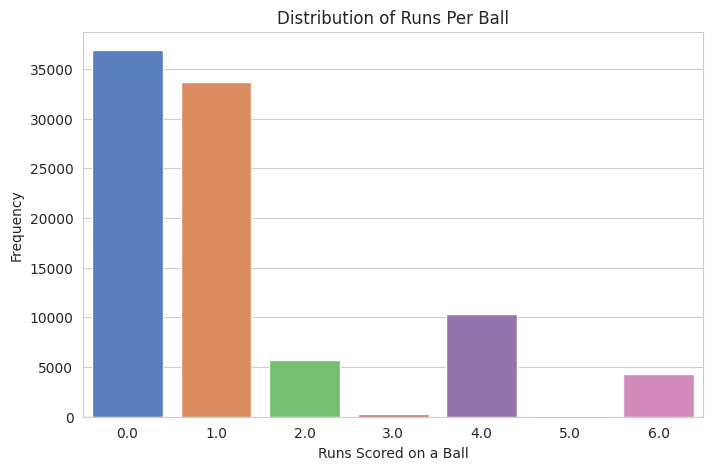

In [ ]:
# 5. Distribution of Runs Per Ball (1s, 2s, 4s, 6s)
runs_distribution = deliveries_df["batsman_runs"].value_counts().sort_index()
plt.figure(figsize=(8, 5))
sns.barplot(x=runs_distribution.index, y=runs_distribution.values, palette="muted")
plt.title("Distribution of Runs Per Ball")
plt.xlabel("Runs Scored on a Ball")
plt.ylabel("Frequency")
plt.show()


<ipython-input-19-ae38383ca173>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_batsmen.index, x=top_batsmen["strike_rate"], palette="rocket")


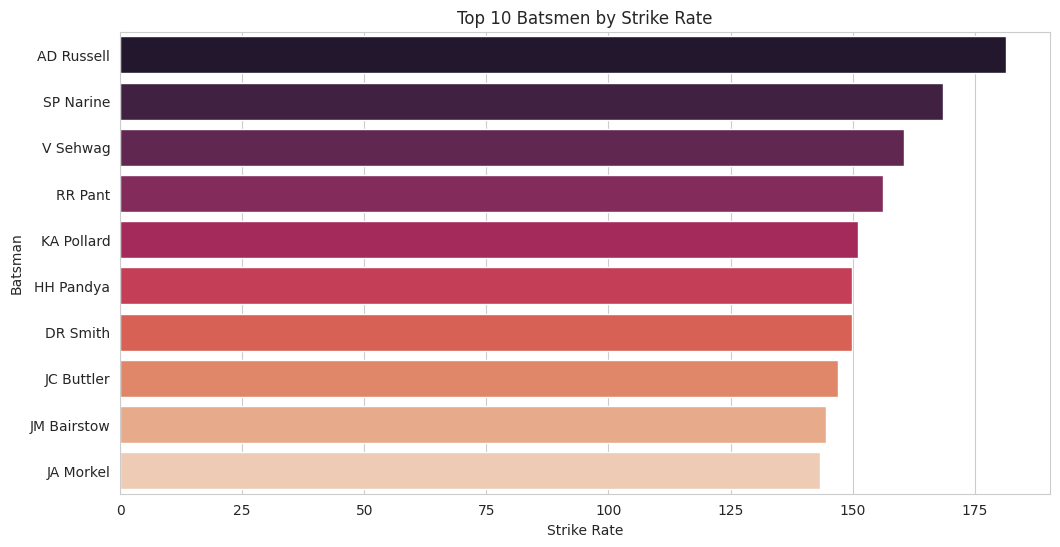

In [ ]:
# 6. Top 10 Batsmen by Strike Rate
batsman_stats = deliveries_df.groupby("batter").agg(
    total_runs=("batsman_runs", "sum"),
    balls_faced=("ball", "count")
)
batsman_stats["strike_rate"] = (batsman_stats["total_runs"] / batsman_stats["balls_faced"]) * 100
top_batsmen = batsman_stats[batsman_stats["balls_faced"] >= 200].nlargest(10, "strike_rate")
plt.figure(figsize=(12, 6))
sns.barplot(y=top_batsmen.index, x=top_batsmen["strike_rate"], palette="rocket")
plt.title("Top 10 Batsmen by Strike Rate")
plt.xlabel("Strike Rate")
plt.ylabel("Batsman")
plt.show()


<ipython-input-20-d4e1b94e392d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_six_hitters.index, x=top_six_hitters.values, palette="magma")


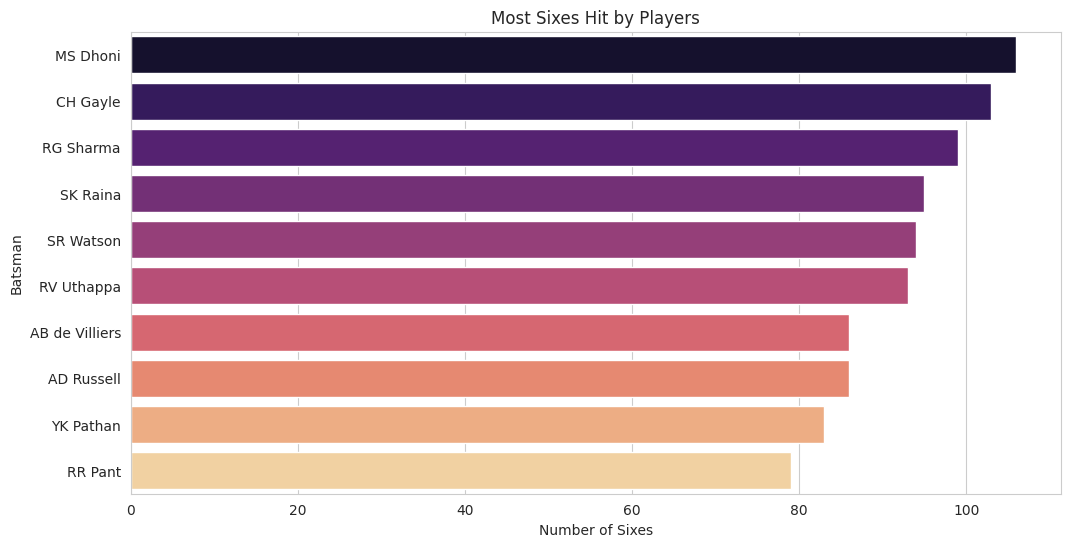

In [ ]:
# 7. Most Sixes Hit by Players
most_sixes = deliveries_df[deliveries_df["batsman_runs"] == 6].groupby("batter")["batsman_runs"].count()
top_six_hitters = most_sixes.nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(y=top_six_hitters.index, x=top_six_hitters.values, palette="magma")
plt.title("Most Sixes Hit by Players")
plt.xlabel("Number of Sixes")
plt.ylabel("Batsman")
plt.show()


<ipython-input-21-bdb0529065aa>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_dot_bowlers.index, x=top_dot_bowlers.values, palette="Blues_r")


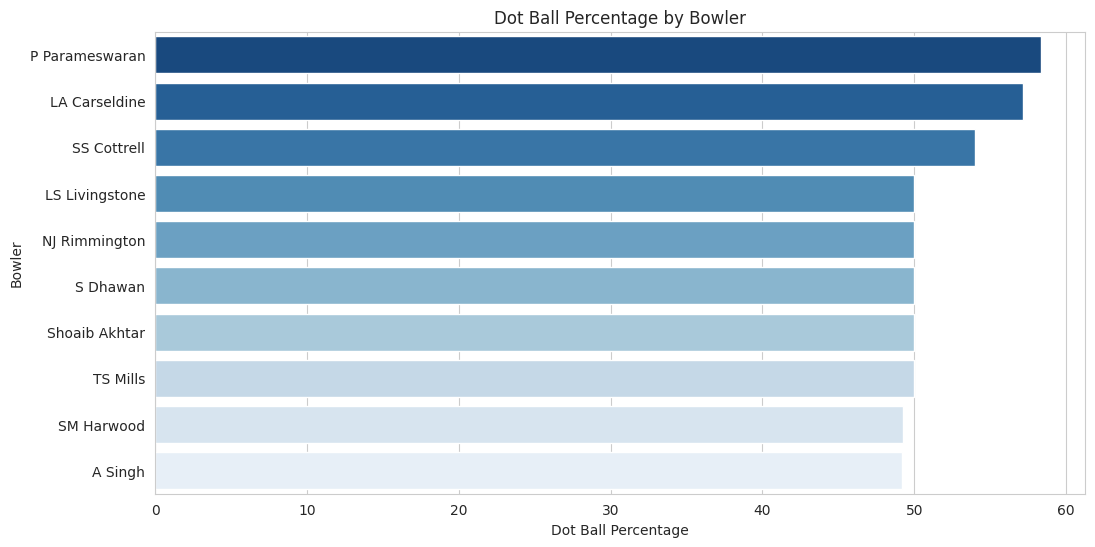

In [ ]:
# 8. Dot Ball Percentage by Bowler
dot_balls = deliveries_df[deliveries_df["total_runs"] == 0].groupby("bowler")["total_runs"].count()
total_balls = deliveries_df.groupby("bowler")["total_runs"].count()
dot_ball_percentage = (dot_balls / total_balls) * 100
top_dot_bowlers = dot_ball_percentage.nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(y=top_dot_bowlers.index, x=top_dot_bowlers.values, palette="Blues_r")
plt.title("Dot Ball Percentage by Bowler")
plt.xlabel("Dot Ball Percentage")
plt.ylabel("Bowler")
plt.show()


<ipython-input-22-93d309cb512b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_boundary_bowlers.index, x=top_boundary_bowlers.values, palette="Reds_r")


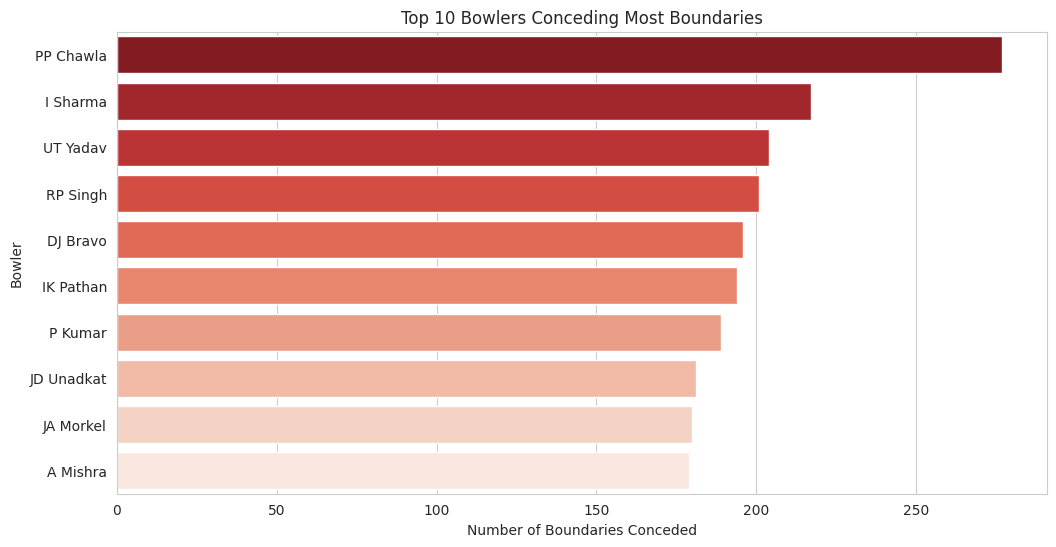

In [ ]:
# 9. Top 10 Bowlers Conceding Most Boundaries
boundaries = deliveries_df[deliveries_df["batsman_runs"].isin([4, 6])].groupby("bowler")["batsman_runs"].count()
top_boundary_bowlers = boundaries.nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(y=top_boundary_bowlers.index, x=top_boundary_bowlers.values, palette="Reds_r")
plt.title("Top 10 Bowlers Conceding Most Boundaries")
plt.xlabel("Number of Boundaries Conceded")
plt.ylabel("Bowler")
plt.show()


<ipython-input-23-f32e9c1722c7>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=wickets_per_over.index, y=wickets_per_over.values, palette="Purples_r")


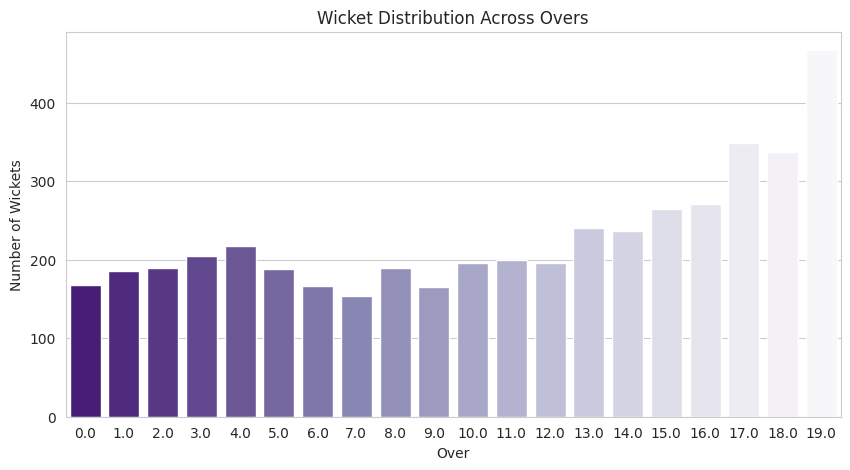

In [ ]:
# 10. Wicket Distribution Across Overs
wickets_per_over = deliveries_df[deliveries_df["is_wicket"] == 1].groupby("over")["is_wicket"].count()
plt.figure(figsize=(10, 5))
sns.barplot(x=wickets_per_over.index, y=wickets_per_over.values, palette="Purples_r")
plt.title("Wicket Distribution Across Overs")
plt.xlabel("Over")
plt.ylabel("Number of Wickets")
plt.show()



<ipython-input-24-9dcf213e3b75>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=powerplay_runs.index, x=powerplay_runs.values, palette="Greens_r")


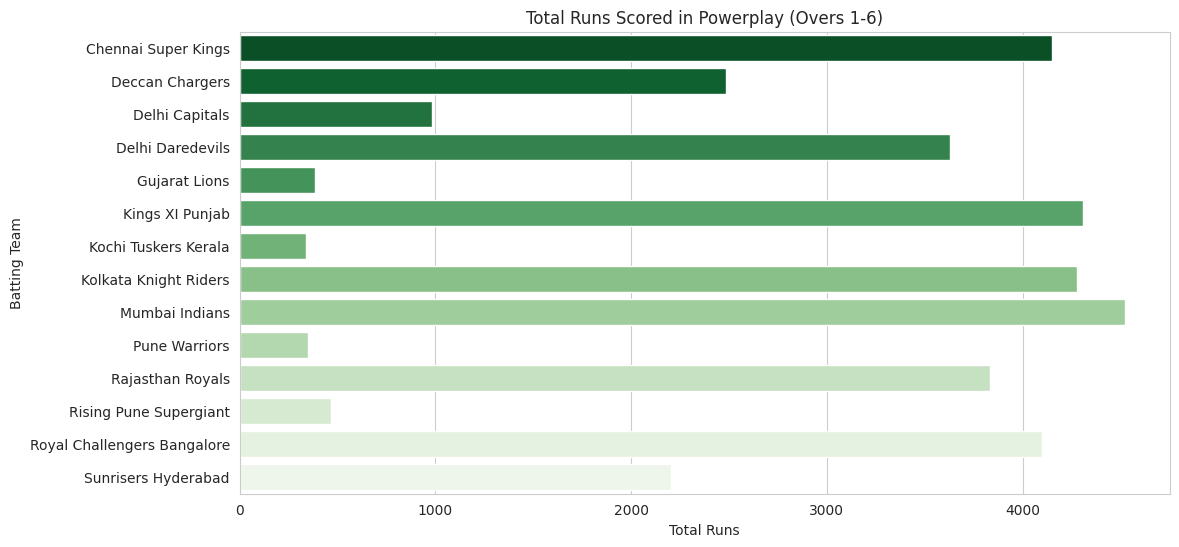

In [ ]:
# 11. Total Runs Scored in Powerplay (Overs 1-6)
powerplay_runs = deliveries_df[deliveries_df["over"] < 6].groupby("batting_team")["total_runs"].sum()
plt.figure(figsize=(12, 6))
sns.barplot(y=powerplay_runs.index, x=powerplay_runs.values, palette="Greens_r")
plt.title("Total Runs Scored in Powerplay (Overs 1-6)")
plt.xlabel("Total Runs")
plt.ylabel("Batting Team")
plt.show()


<ipython-input-25-9f22b7a1bad9>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=death_over_runs.index, x=death_over_runs.values, palette="Oranges_r")


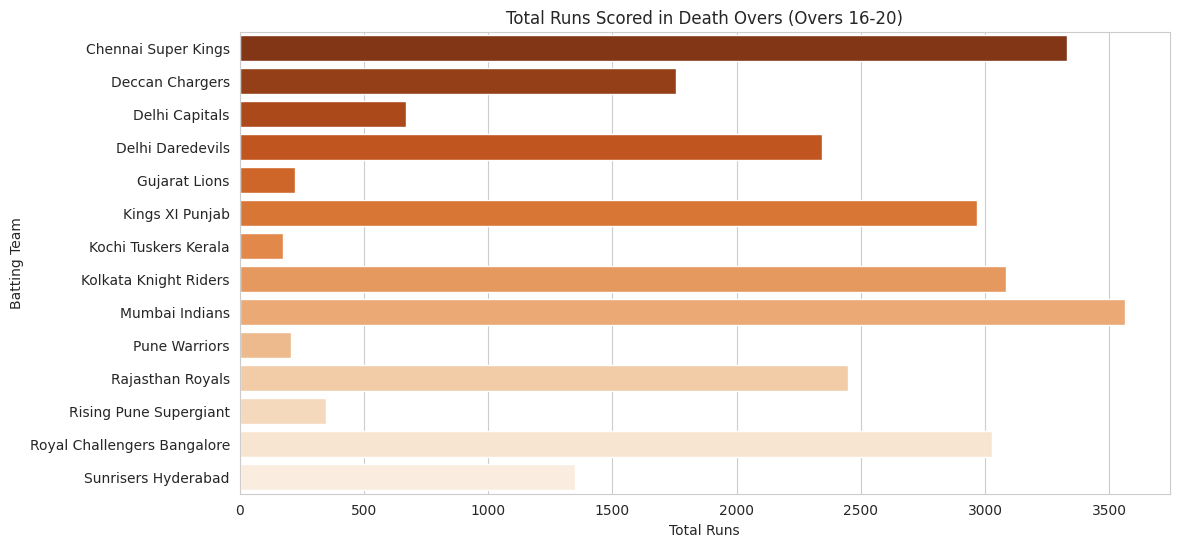

In [ ]:
 # 12. Total Runs Scored in Death Overs (Overs 16-20)
death_over_runs = deliveries_df[deliveries_df["over"] >= 16].groupby("batting_team")["total_runs"].sum()
plt.figure(figsize=(12, 6))
sns.barplot(y=death_over_runs.index, x=death_over_runs.values, palette="Oranges_r")
plt.title("Total Runs Scored in Death Overs (Overs 16-20)")
plt.xlabel("Total Runs")
plt.ylabel("Batting Team")
plt.show()

<ipython-input-26-433a666a6ffb>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_economical_bowlers.index, x=top_economical_bowlers["economy_rate"], palette="BuGn_r")


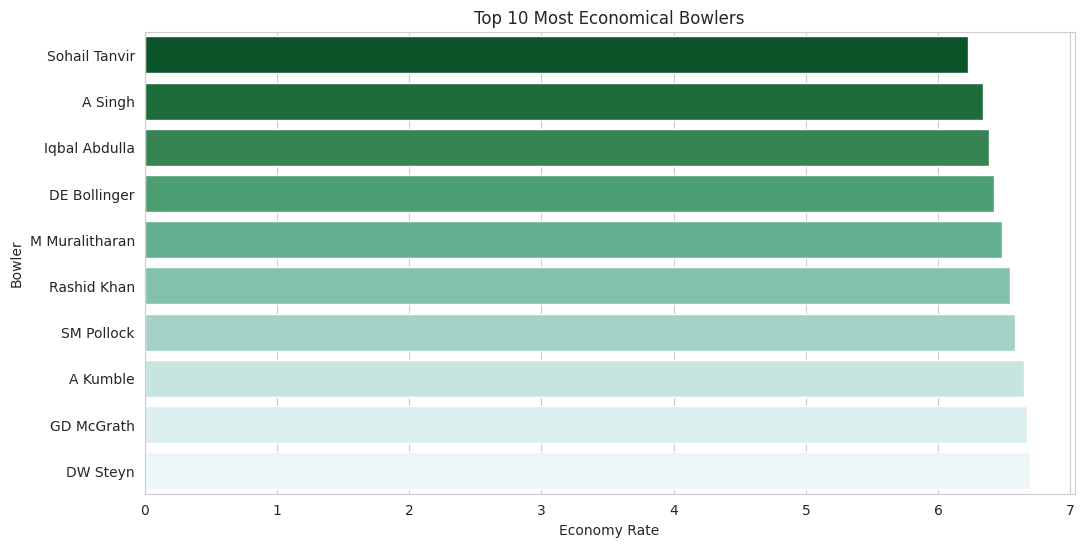

In [ ]:
# 13. Top 10 Most Economical Bowlers (Minimum 200 Balls Bowled)
bowler_stats = deliveries_df.groupby("bowler").agg(
    total_runs_conceded=("total_runs", "sum"),
    total_balls_bowled=("ball", "count")
)
# Calculate economy rate
bowler_stats["economy_rate"] = (bowler_stats["total_runs_conceded"] / (bowler_stats["total_balls_bowled"] / 6))
# Get top 10 most economical bowlers (minimum 200 balls bowled)
top_economical_bowlers = bowler_stats[bowler_stats["total_balls_bowled"] >= 200].nsmallest(10, "economy_rate")
plt.figure(figsize=(12, 6))
sns.barplot(y=top_economical_bowlers.index, x=top_economical_bowlers["economy_rate"], palette="BuGn_r")
plt.title("Top 10 Most Economical Bowlers")
plt.xlabel("Economy Rate")
plt.ylabel("Bowler")
plt.show()